In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from tensorflow import keras

import pickle

TEST_SIZE = 0.3

c:\Users\User\miniconda3\envs\mlda-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv("datasets/final_model.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70756 entries, 0 to 70755
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 70756 non-null  object 
 1   use_https           70756 non-null  int64  
 2   has_ip              70756 non-null  int64  
 3   length_of_url       70756 non-null  int64  
 4   symbols_to_totalch  70756 non-null  float64
 5   have_at             70756 non-null  int64  
 6   have_redirection    70756 non-null  int64  
 7   path_to_url_length  70756 non-null  float64
 8   subdomains          70756 non-null  int64  
 9   is_phishing         70756 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 5.4+ MB


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
use_https,70756.0,0.193581,0.395107,0.00000,0.00000,0.00000,0.00000,1.00000
has_ip,70756.0,0.000452,0.021262,0.00000,0.00000,0.00000,0.00000,1.00000
length_of_url,70756.0,89.780810,46.794274,16.00000,68.00000,88.00000,104.00000,2081.00000
symbols_to_totalch,70756.0,0.170029,0.048846,0.01726,0.14013,0.16216,0.19355,0.41176
have_at,70756.0,0.007703,0.087426,0.00000,0.00000,0.00000,0.00000,1.00000
have_redirection,70756.0,0.007604,0.086867,0.00000,0.00000,0.00000,0.00000,1.00000
path_to_url_length,70756.0,0.026242,0.019528,0.00000,0.01667,0.02564,0.03226,0.16505
subdomains,70756.0,3.154870,1.329141,2.00000,2.00000,3.00000,5.00000,10.00000
is_phishing,70756.0,0.500000,0.500004,0.00000,0.00000,0.50000,1.00000,1.00000


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
cols = ['length_of_url', 'subdomains']

for col in cols:
    data[col] = scaler.fit_transform(data[[col]])
    
data.describe()

,use_https,has_ip,length_of_url,symbols_to_totalch,have_at,have_redirection,path_to_url_length,subdomains,is_phishing
count,70756.000000,70756.000000,70756.000000,70756.000000,70756.000000,70756.000000,70756.000000,70756.000000,70756.000000
mean,0.193581,0.000452,0.035729,0.170029,0.007703,0.007604,0.026242,0.144359,0.500000
std,0.395107,0.021262,0.022661,0.048846,0.087426,0.086867,0.019528,0.166143,0.500004
min,0.000000,0.000000,0.000000,0.017260,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.025182,0.140130,0.000000,0.000000,0.016670,0.000000,0.000000
50%,0.000000,0.000000,0.034867,0.162160,0.000000,0.000000,0.025640,0.125000,0.500000
75%,0.000000,0.000000,0.042615,0.193550,0.000000,0.000000,0.032260,0.375000,1.000000
max,1.000000,1.000000,1.000000,0.411760,1.000000,1.000000,0.165050,1.000000,1.000000


Spearman Correlation

<AxesSubplot:>

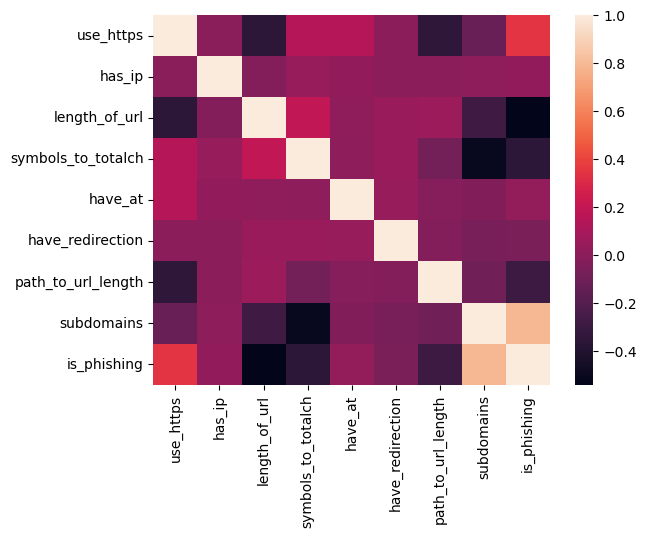

In [5]:
sns.heatmap(data.iloc[1:].corr(), fmt=".2f")

<AxesSubplot:>

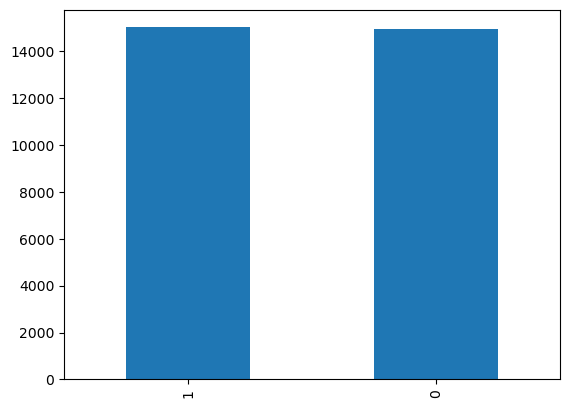

In [6]:
df = data.sample(n=30000)
df.is_phishing.value_counts().plot(kind="bar")

In [7]:
x = df.drop(columns=['url', 'is_phishing'])
y = df.is_phishing

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=TEST_SIZE
)
x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values 

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21000, 8), (21000,), (9000, 8), (9000,))

XGB Classifier

In [8]:
xgb = XGBClassifier(n_estimators=300, use_label_encoder=False)
score = cross_val_score(xgb, x_train, y_train, cv=5, scoring="accuracy")
print(f"""
    Accuracy: {score.mean()}
    Standard Deviation: {score.std()}
""")

[10:57:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:05] WARNING:

Gradient Boosting Classifier

In [9]:
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc.fit(x_train,y_train)
y_test_gbc = gbc.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_test_gbc)}")

Accuracy: 0.9943333333333333


In [10]:
print(classification_report(y_test_gbc, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4512
           1       0.99      0.99      0.99      4488

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



Multi-Layer Perceptron Classifier

In [11]:
mlp = MLPClassifier(
    hidden_layer_sizes=(150,100,50), 
    max_iter=500,
    activation = 'relu',
    solver='adam',
    random_state=1
)
mlp.fit(x_train, y_train)
y_test_mlp = mlp.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_test_mlp)}")

Accuracy: 0.9946666666666667


In [12]:
print(classification_report(y_test_mlp, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4523
           1       0.99      1.00      0.99      4477

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



Long Short-Term Memory Networks

In [13]:
x_lstm_train = np.expand_dims(x_train, axis=2)
x_lstm_test = np.expand_dims(x_test, axis=2)

x_lstm_test[0].shape

(8, 1)

In [14]:
model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=(8,1)),
    keras.layers.Conv1D(filters=64,kernel_size=7,activation='relu'),

    keras.layers.MaxPooling1D(pool_size=2) ,
    keras.layers.Dropout(0.5),

    keras.layers.LSTM(100),
    # layers.Dropout(0.3),
    # layers.Flatten(), # flatten out the layers
    # layers.Dense(512,activation='relu'),
    # layers.BatchNormalization(),
    # layers.Dropout(0.3),

    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [15]:
model.fit(
    x_lstm_train, y_train,
    epochs=10,
)

Epoch 1/10
657/657 [==============================] - 7s 6ms/step - loss: 0.1740 - binary_accuracy: 0.9463
Epoch 2/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0778 - binary_accuracy: 0.9740
Epoch 3/10
657/657 [==============================] - 4s 5ms/step - loss: 0.0527 - binary_accuracy: 0.9825
Epoch 4/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0425 - binary_accuracy: 0.9856
Epoch 5/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0386 - binary_accuracy: 0.9869
Epoch 6/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0385 - binary_accuracy: 0.9875
Epoch 7/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0353 - binary_accuracy: 0.9883
Epoch 8/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0337 - binary_accuracy: 0.9886
Epoch 9/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0339 - binary_accuracy: 0.9890
Epoch 10/10
657/657 [================

In [16]:
scores = model.evaluate(x_test,  y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


282/282 - 2s - loss: 0.0320 - binary_accuracy: 0.9891 - 2s/epoch - 5ms/step
binary_accuracy: 98.91%


In [17]:
# Save models
with open("models/xgb.pkl", "wb") as model_file:
    pickle.dump(xgb, model_file)

with open("models/gbc.pkl", "wb") as model_file:
    pickle.dump(gbc, model_file)

with open("models/mlp.pkl", "wb") as model_file:
    pickle.dump(mlp, model_file)
    
model.save("models/lstm")

INFO:tensorflow:Assets written to: models/lstm\assets


INFO:tensorflow:Assets written to: models/lstm\assets
